# Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

Name: This column represents the name of the patient associated with the healthcare record.

Age: The age of the patient at the time of admission, expressed in years.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("healthcare_dataset.csv")


In [ ]:
df.shape

(55500, 15)

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


# Cleaning Data (checking for Missing values and Duplication )

In [ ]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
df.duplicated().sum()

534

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# Data Visualization

## Numerical Data

In [ ]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
print(f"We have {len(numerical_features)} numerical features: {numerical_features}")

We have 3 numerical features: Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


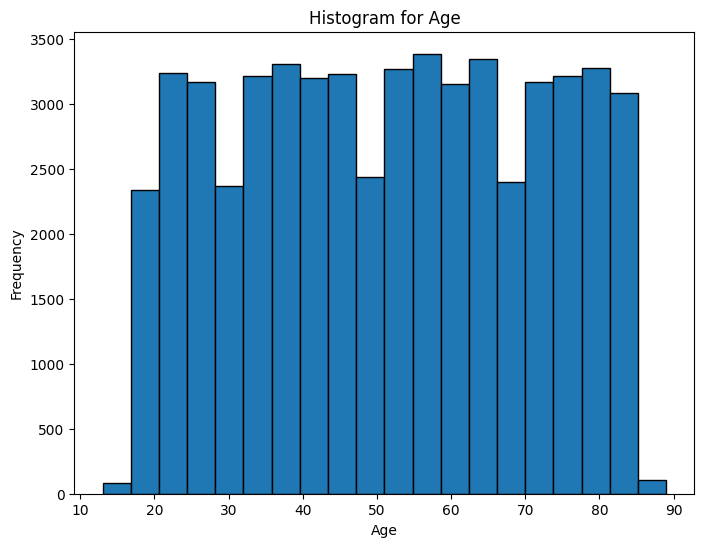

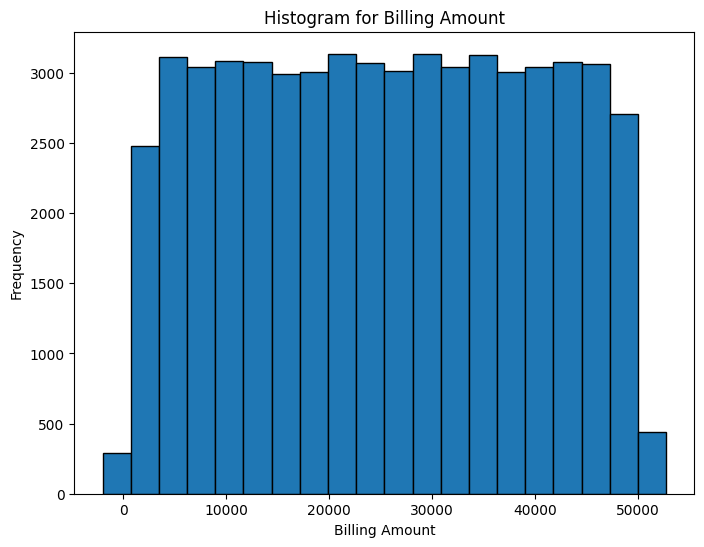

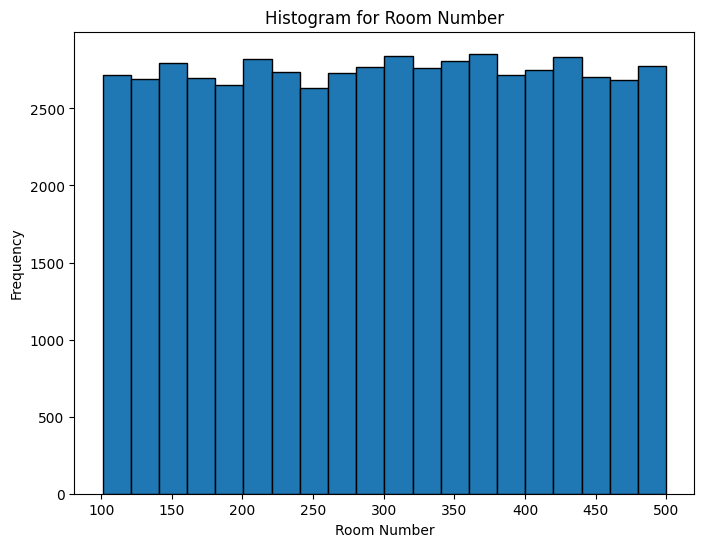

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[i], bins=20, edgecolor="black" )
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.title(f"Histogram for {i}")
  plt.show()

In [ ]:
# Age and Billing Amount ---> Normal Distribution

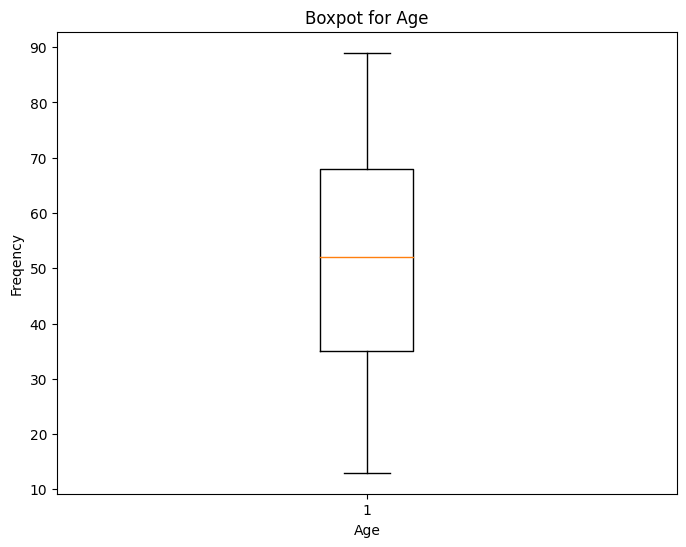

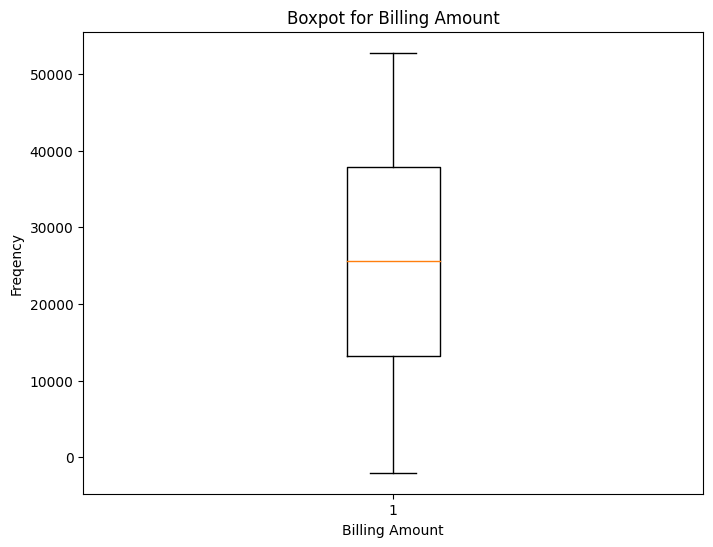

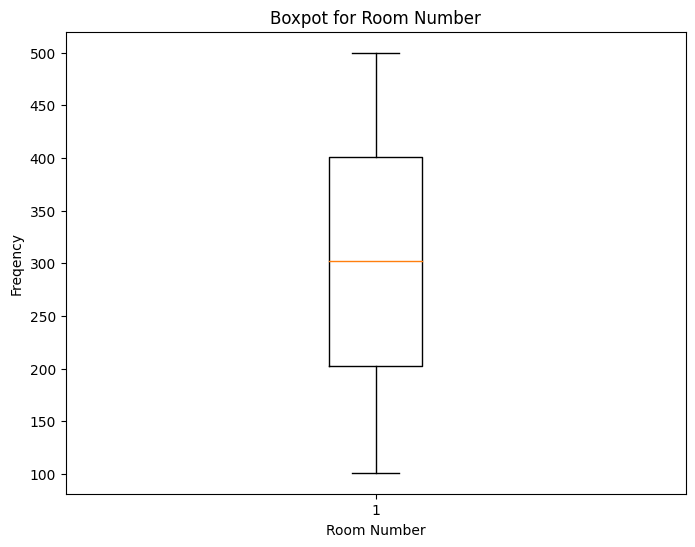

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(8,6))
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel("Freqency")
  plt.title(f"Boxpot for {i}")
  plt.show()

In [ ]:
# There is no outlier data

In [ ]:
Correlation_matrix = df[numerical_features].corr()
Correlation_matrix

,Age,Billing Amount,Room Number
Age,1.000000,-0.003427,-0.000352
Billing Amount,-0.003427,1.000000,-0.003930
Room Number,-0.000352,-0.003930,1.000000


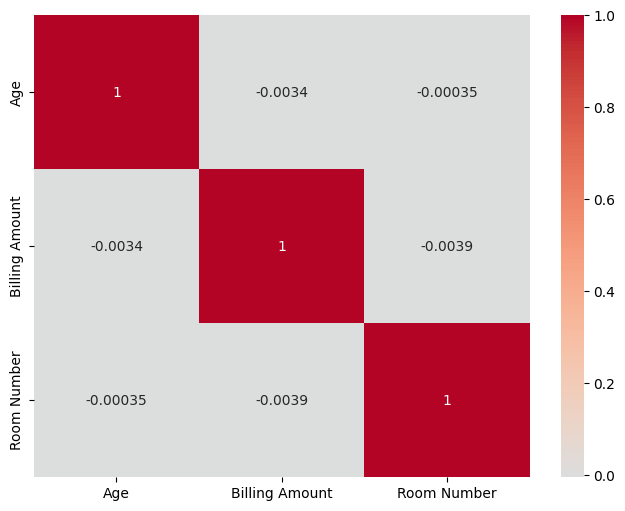

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

In [ ]:
# there is no relation between the numerical data

In [ ]:
df["Test Results"].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [ ]:
# We change the Test Result column (target column) to numerical to check if there is any realtion between the numeric features and the target

In [ ]:
df_map = df.copy()

test_result_dict = {
    "Abnormal": 0,
    "Normal": 1,
    "Inconclusive": 2,
}

df_map["Test_result_num"] = df_map["Test Results"].map(test_result_dict)

In [ ]:
df_map.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Test_result_num
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,1
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,0
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,0


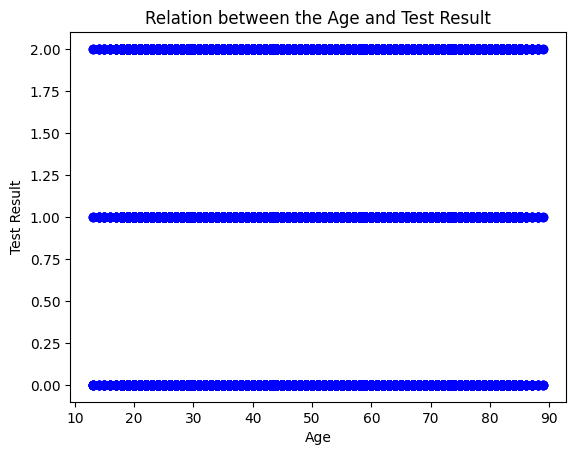

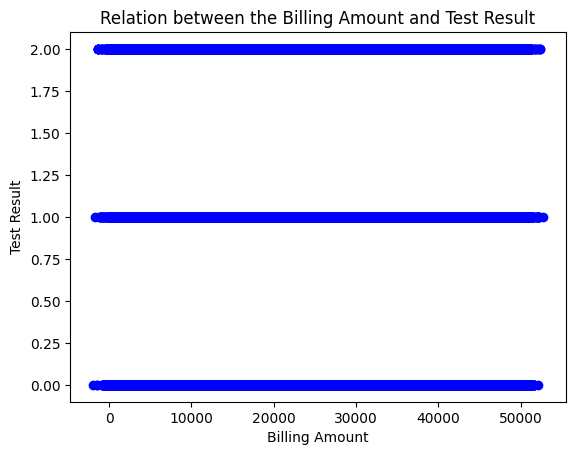

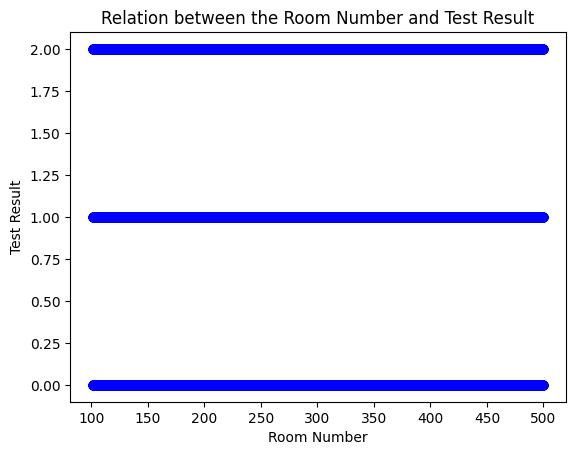

In [ ]:
for i in numerical_features:
  plt.scatter(df_map[i],df_map["Test_result_num"], c="blue", marker="o" )
  plt.xlabel(i)
  plt.ylabel("Test Result")
  plt.title(f"Relation between the {i} and Test Result")
  plt.show()

In [ ]:
# there is no leaniar relation between the numerical data and the target

## categorical data

In [ ]:
categorical_features = df[['Gender','Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type','Medication', 'Test Results']].columns
categorical_features

Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

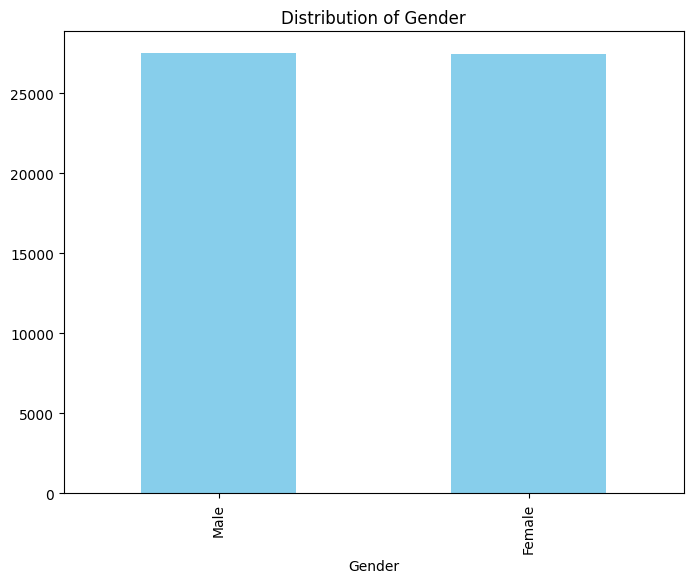

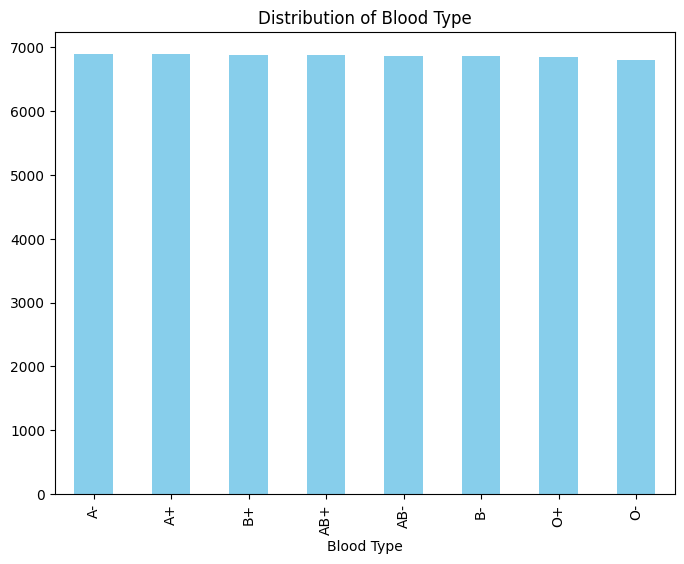

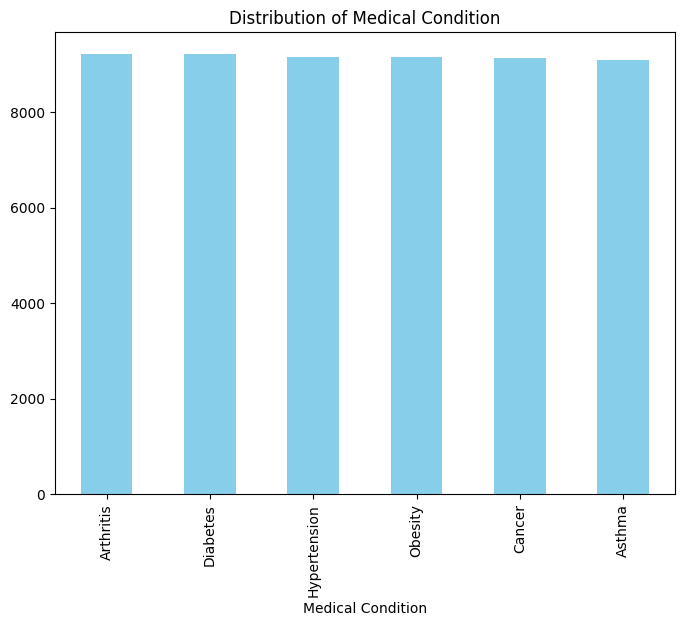

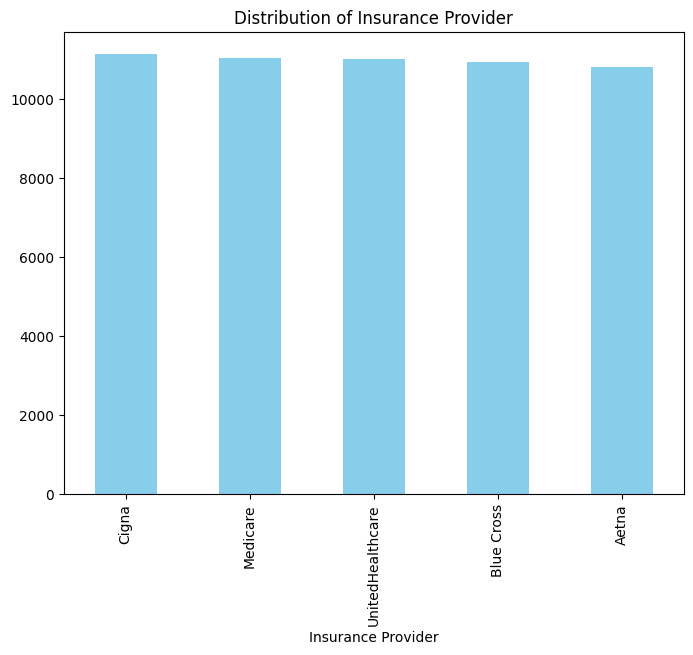

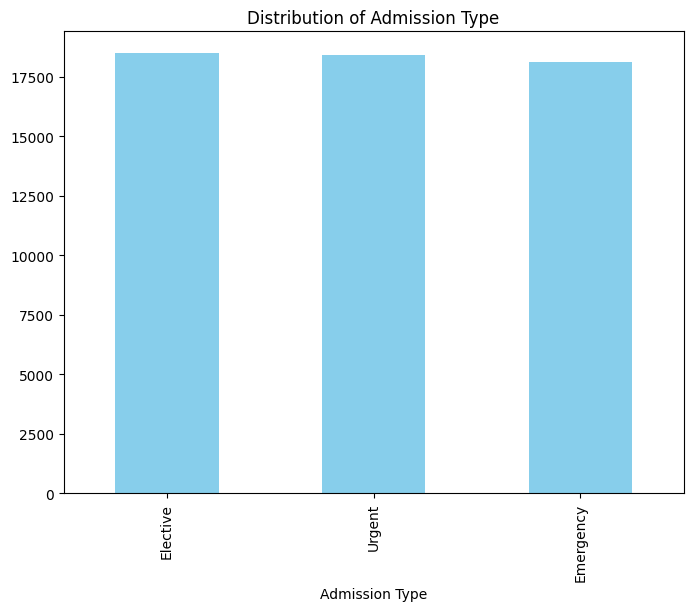

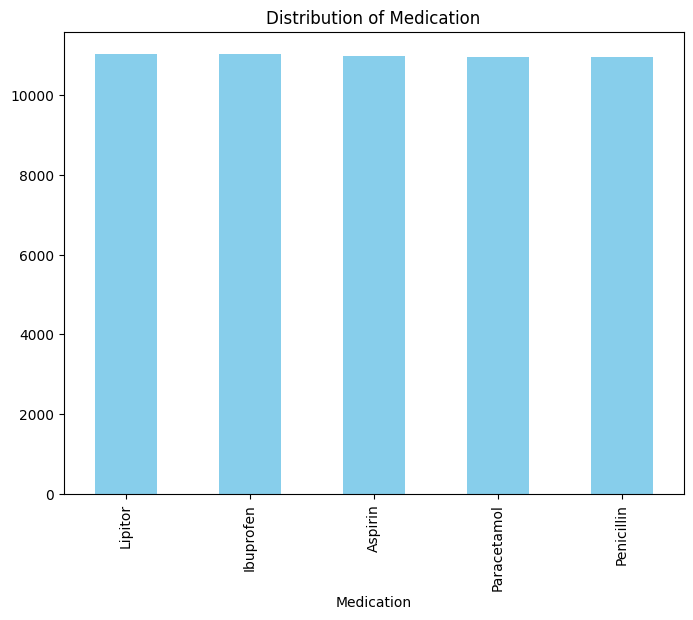

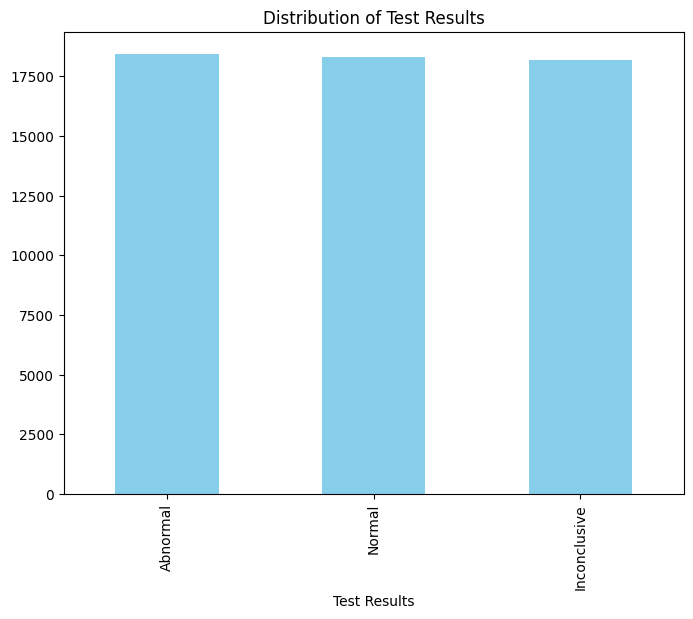

In [ ]:
for i in categorical_features:
  counts = df[i].value_counts()

  plt.figure(figsize=(8,6))
  counts.plot(kind='bar', color="skyblue")
  plt.title(f"Distribution of {i}")
  plt.show()

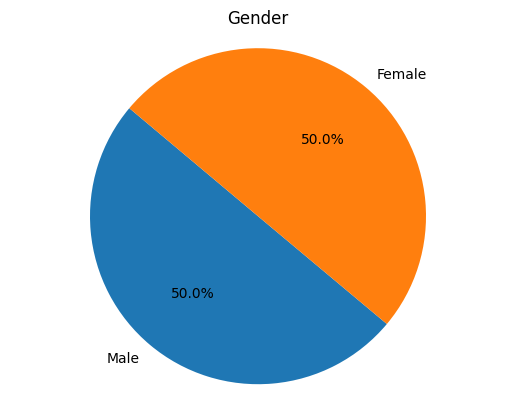

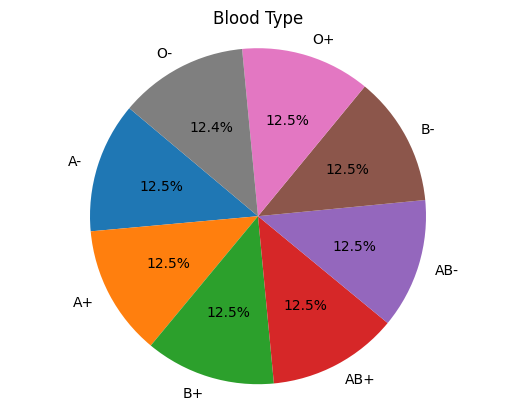

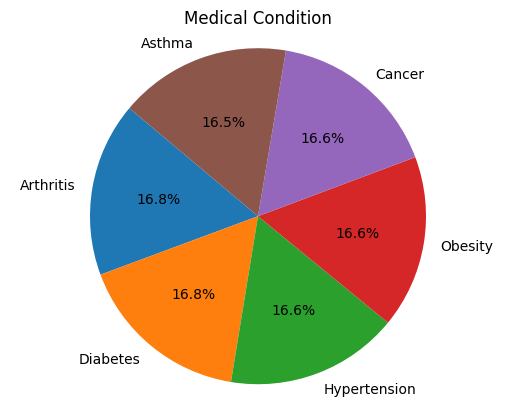

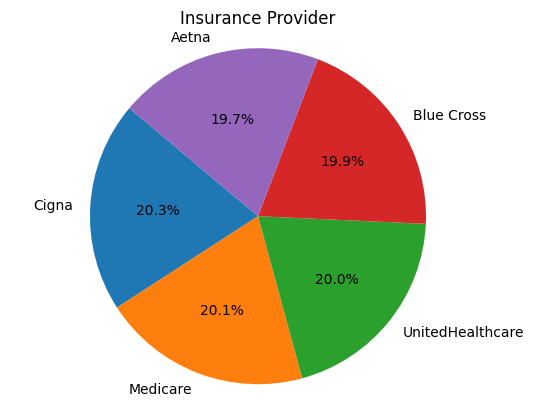

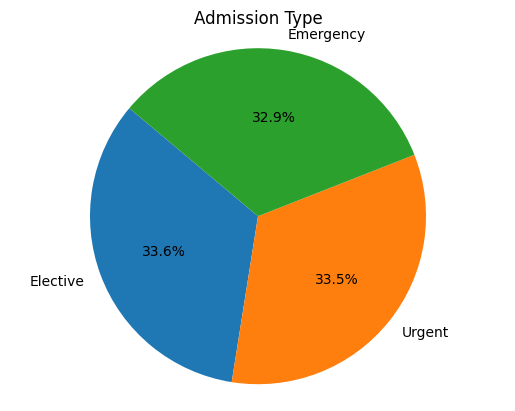

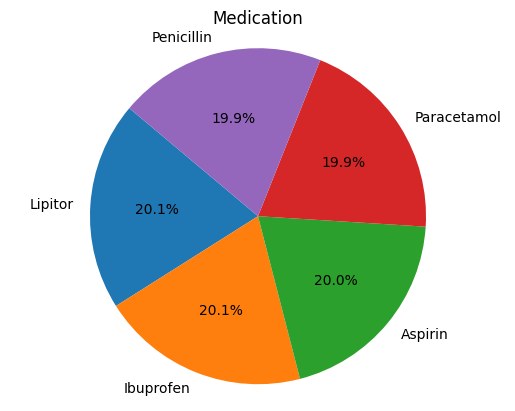

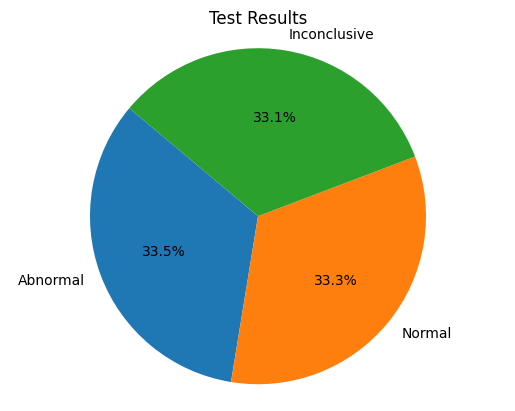

In [ ]:
for i in categorical_features:
  counts = df[i].value_counts()

  plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
  plt.axis("equal")
  plt.title(i)
  plt.show()

In [ ]:
# the data we have well % between each others

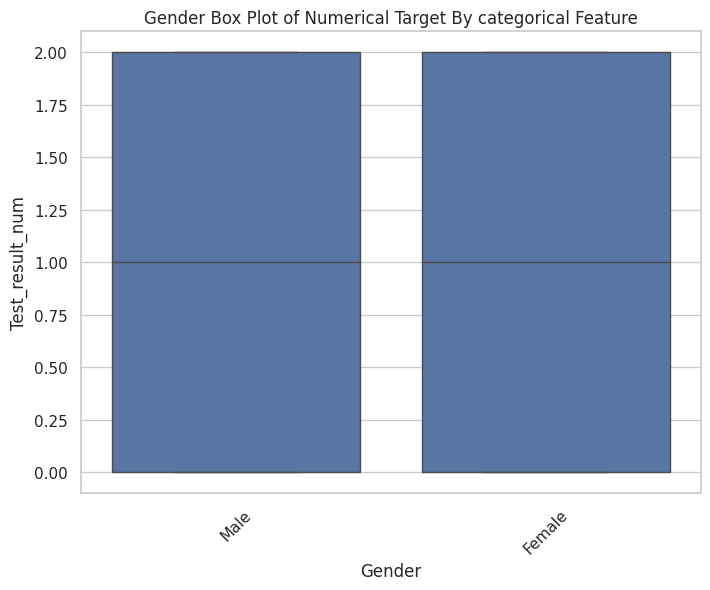

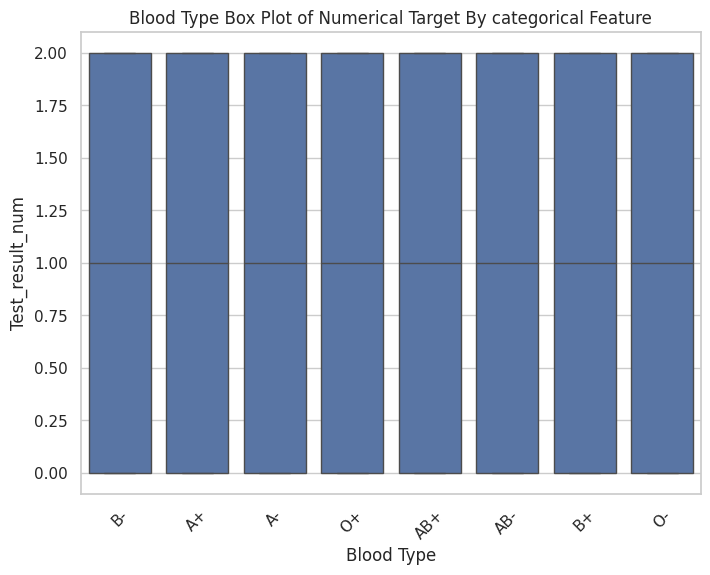

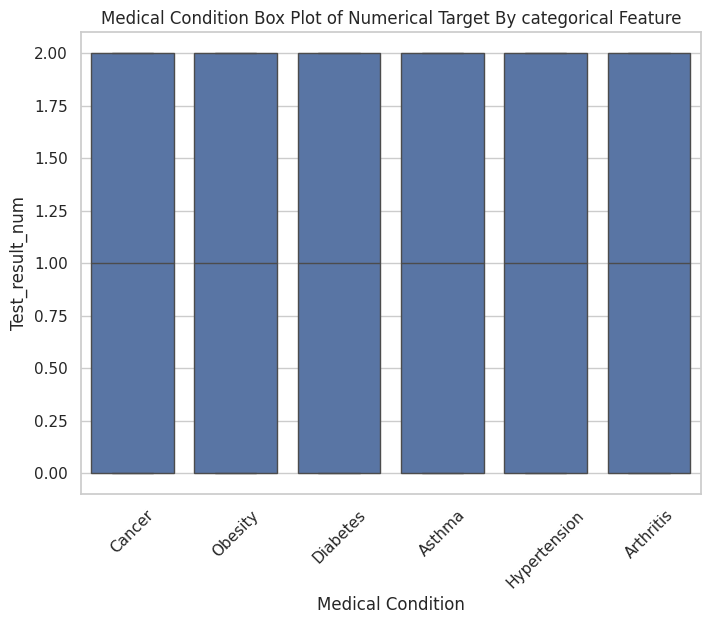

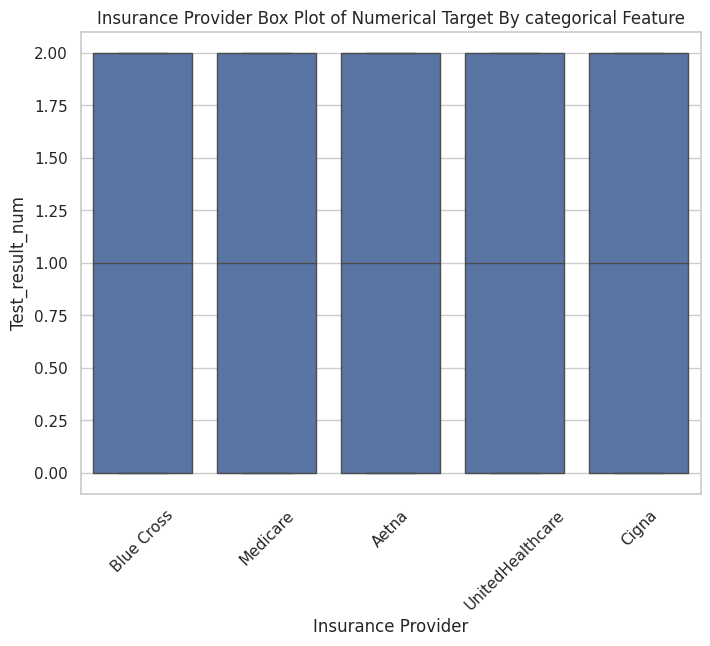

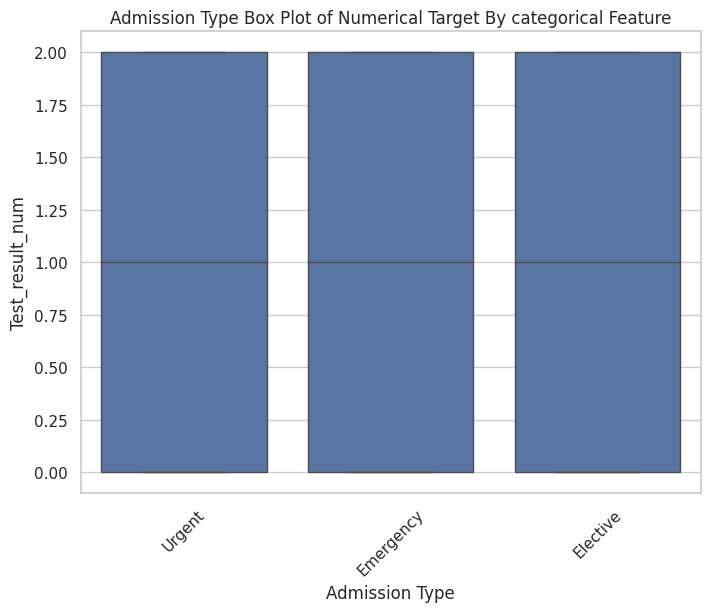

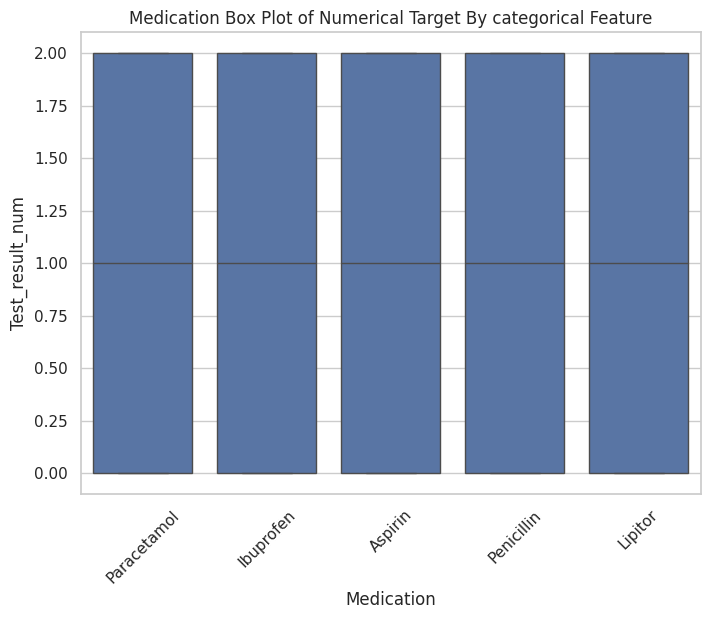

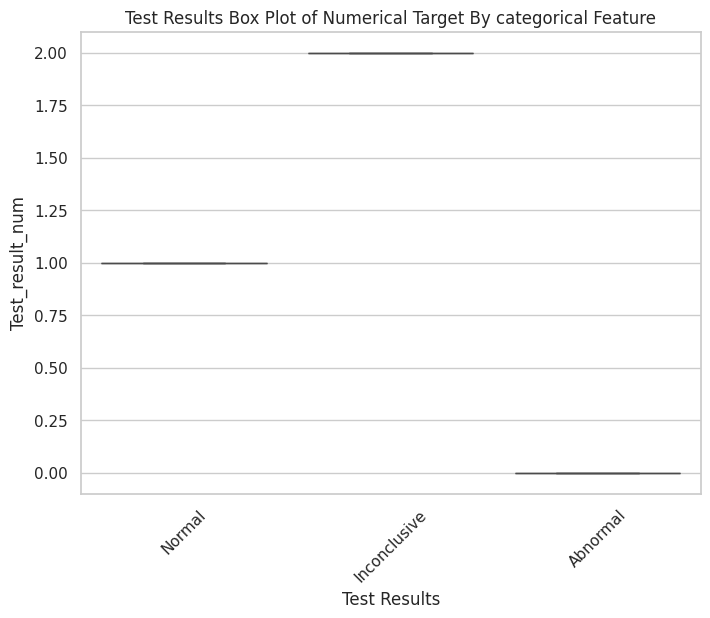

In [ ]:
for i in categorical_features:
  sns.set(style="whitegrid")
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=i, y="Test_result_num", data=df_map)
  plt.title(f"{i} Box Plot of Numerical Target By categorical Feature")
  plt.xticks(rotation=45)
  plt.show()

# Data Analysis Report

#Data Cleaning
There is no missing data (NaN) in any of the columns.

A total of 534 records were removed from the dataset during data cleaning.
The data is now cleared and ready to be used.
#Details About the Columns

**Name**: This column represents the name of the patient associated with the healthcare record.

**Age**: The age of the patient at the time of admission, expressed in years. It follows a normal distribution.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: Specifies the primary medical condition or diagnosis associated with the patient.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: Indicates the patient's insurance provider.
Billing Amount: The amount of money billed for the patient's healthcare services during their admission. It follows a normal distribution.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent."

Discharge Date: The date on which the patient was discharged from the healthcare facility.

Medication: Identifies a medication prescribed or administered to the patient during their admission.

Test Results: Describes the results of a medical test conducted during the patient's admission.

#Additional Information

Age and Billing Amount: Follow a normal distribution.

Outliers: No outlier data present.

Correlation: No correlation between numerical features.

Linear Relationship: No linear relationship between target and numerical features.

Categorical Features: Well-distributed according to pie charts.

Categorical Features Barplot: Equal distribution with data size.

#Here some information that can help you with your next step:

Name: No need for this column.

Age: Normal Distribution.

Gender: Ordinal data with categories "Male" and "Female".

Blood Type: categories "A-", "A+", "B+", "AB+", "AB-", "B-", "O+", and "O-".

Medical Condition: Possible values include "Arthritis", "Diabetes", "Hypertension", "Obesity", and "Asthma".

Date of Admission: No need for this column.

Doctor: No need for this column.

Hospital: No need for this column.

Insurance Provider: Categorical data with options "Aetna", "Blue Cross", "Cigna", "UnitedHealthcare", and "Medicare".

Billing Amount: Normal Distribution.

Room Number: No need for this column.

Admission Type: Possible values include "Emergency," "Elective," or "Urgent".
Discharge Date: No need for this column.

Medication: Possible values include "Aspirin", "Ibuprofen", "Penicillin", "Paracetamol", and "Lipitor".

Test Results: Possible values include "Normal", "Abnormal", or "Inconclusive".

#Split data to Train, validation and test (because we don't have test data)

In [ ]:
df = df.sample(frac=0.8, random_state=2024)
df_test = df.drop(df.index)

df, df_test

(                  Name  Age  Gender Blood Type Medical Condition  \
 30423  ELiZAbeTh ortiZ   83    Male         A+           Obesity   
 39064   RIcHArd BailEy   62  Female        AB-            Cancer   
 38074      KeLLY ClARk   67  Female         B+           Obesity   
 44350     ScOtt WRigHt   78    Male         A+            Cancer   
 9718       BObby WHiTe   39  Female         O+           Obesity   
 ...                ...  ...     ...        ...               ...   
 42830  CarRiE hamILton   46    Male        AB+            Asthma   
 39730     kEVIN MoRRIs   53    Male         O+          Diabetes   
 1418    hEIdI BuCHanan   41    Male         A-            Asthma   
 50770  ALExanDer wILey   27  Female         A+            Cancer   
 4728       Jill paTTon   28    Male         B-            Cancer   
 
       Date of Admission             Doctor                        Hospital  \
 30423        2021-03-24      Cory Mcdowell                 Santos Sons and   
 39064      

## Save every dataset

In [ ]:
df.to_csv("healthcare_train.csv", index=False)
df_test.to_csv("healthcare_test.csv", index=False)

#call the Train and validation data and start working on it


In [ ]:
df = pd.read_csv("healthcare_train.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,ELiZAbeTh ortiZ,83,Male,A+,Obesity,2021-03-24,Cory Mcdowell,Santos Sons and,Cigna,5905.440614,276,Elective,2021-04-16,Ibuprofen,Inconclusive
1,RIcHArd BailEy,62,Female,AB-,Cancer,2022-02-09,Jamie Ortiz,"Allen and Moore Holmes,",UnitedHealthcare,38385.728012,489,Urgent,2022-02-12,Lipitor,Inconclusive
2,KeLLY ClARk,67,Female,B+,Obesity,2023-03-11,Jennifer Anderson,"and Macdonald Campbell, Walker",Blue Cross,44470.398270,498,Urgent,2023-03-16,Lipitor,Abnormal
3,ScOtt WRigHt,78,Male,A+,Cancer,2019-09-29,Heather Williams,"and Reyes Phillips, Miller",Blue Cross,20961.880359,159,Emergency,2019-10-22,Penicillin,Normal
4,BObby WHiTe,39,Female,O+,Obesity,2023-06-02,Kaitlyn Kane,Ltd Tucker,Blue Cross,13425.790905,375,Urgent,2023-06-22,Penicillin,Normal


In [ ]:
df.shape

(43973, 15)

#Encoding the categorical feature

In [ ]:
# we have Gender and Test Results as ordinal data so we gona use LabelEncoder
# for The Blood Type, Medical Condition, Insurance Provider, Admission Type, Medication Not ordinal so we gona use One Hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot_encoding(dataframe):
  categorical_one_hot = ["Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication"]
  encoder = OneHotEncoder(sparse=False)

  # Fit and transform the categorical data
  encoded_data = encoder.fit_transform(dataframe[categorical_one_hot])

  # Create a DataFrame with the encoded data
  encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_one_hot))

  # Concatenate the original dataframe (without the original categorical columns) with the new encoded dataframe
  result = pd.concat([dataframe.drop(categorical_one_hot, axis=1).reset_index(drop=True), encoded_df], axis=1)
  return result

df = apply_one_hot_encoding(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoder(dataframe):
  le = LabelEncoder()
  for col in ["Gender", "Test Results"]:
    if col in dataframe.columns:
      dataframe[col] = le.fit_transform(dataframe[col])

  return dataframe

df = apply_label_encoder(df)
df

,Name,Age,Gender,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Test Results,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,ELiZAbeTh ortiZ,83,1,2021-03-24,Cory Mcdowell,Santos Sons and,5905.440614,276,2021-04-16,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,RIcHArd BailEy,62,0,2022-02-09,Jamie Ortiz,"Allen and Moore Holmes,",38385.728012,489,2022-02-12,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,KeLLY ClARk,67,0,2023-03-11,Jennifer Anderson,"and Macdonald Campbell, Walker",44470.398270,498,2023-03-16,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,ScOtt WRigHt,78,1,2019-09-29,Heather Williams,"and Reyes Phillips, Miller",20961.880359,159,2019-10-22,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,BObby WHiTe,39,0,2023-06-02,Kaitlyn Kane,Ltd Tucker,13425.790905,375,2023-06-22,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43968,CarRiE hamILton,46,1,2022-05-16,Rachel Smith,Harris Group,41276.765961,106,2022-05-27,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
43969,kEVIN MoRRIs,53,1,2022-11-07,Karen Gonzalez,Johnson-Mejia,20991.560646,300,2022-12-01,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43970,hEIdI BuCHanan,41,1,2023-04-03,Margaret Booker,Brooks PLC,33256.489144,387,2023-04-16,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43971,ALExanDer wILey,27,0,2023-02-15,Philip Pope,"Hill, Krueger and Miller",25221.808903,339,2023-03-16,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(columns = ["Name", "Date of Admission", "Doctor", "Hospital", "Room Number", "Discharge Date"])
df

,Age,Gender,Billing Amount,Test Results,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,83,1,5905.440614,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,62,0,38385.728012,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,67,0,44470.398270,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,78,1,20961.880359,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,39,0,13425.790905,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43968,46,1,41276.765961,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
43969,53,1,20991.560646,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43970,41,1,33256.489144,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43971,27,0,25221.808903,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Split the data for train and validation then scale

In [ ]:
X = df.drop(["Test Results"], axis=1)
y = df["Test Results"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_scaled = ["Age", "Billing Amount"]

scaler = StandardScaler()

scaler.fit(X_train[numerical_scaled])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_scaled] = scaler.transform(X_train[numerical_scaled])
X_test_scaled[numerical_scaled] = scaler.transform(X_test[numerical_scaled])

#Build model
LogisticRegression

KNeighborsClassifier

RandomForestClassifier

SVC

then classification report to evalute the models

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.328595793064241
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.37      0.35      2920
           1       0.32      0.30      0.31      2897
           2       0.33      0.31      0.32      2978

    accuracy                           0.33      8795
   macro avg       0.33      0.33      0.33      8795
weighted avg       0.33      0.33      0.33      8795



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=7)

kn_model.fit(X_train_scaled, y_train)

y_pred = kn_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.35167708925525865
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.43      0.38      2920
           1       0.35      0.34      0.35      2897
           2       0.35      0.29      0.32      2978

    accuracy                           0.35      8795
   macro avg       0.35      0.35      0.35      8795
weighted avg       0.35      0.35      0.35      8795



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n:", classification_report(y_test, y_pred))

Test Accuracy: 0.40864127345082435
Classification Report
:               precision    recall  f1-score   support

           0       0.40      0.42      0.41      2920
           1       0.41      0.40      0.40      2897
           2       0.42      0.40      0.41      2978

    accuracy                           0.41      8795
   macro avg       0.41      0.41      0.41      8795
weighted avg       0.41      0.41      0.41      8795



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear")

svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Test Accuracy: 0.3333712336554861
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40      2920
           1       0.33      0.40      0.36      2897
           2       0.33      0.12      0.18      2978

    accuracy                           0.33      8795
   macro avg       0.33      0.33      0.31      8795
weighted avg       0.33      0.33      0.31      8795



#Save and Load the File

In [ ]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
rf_model = joblib.load("rf_model.pkl")

In [ ]:
new_data = [[-1.1009187148543993,0,-1.3639668352634,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0]]

prediction = rf_model.predict(new_data)

print(f"The prediction is {prediction}")


The prediction is [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


Accuracy: 0.3333712336554861
Precision: 0.3315592748931526
Recall: 0.3333712336554861
F1-Score: 0.31208666169102445
Confusion Matrix: 
[[1393 1144  383]
 [1346 1167  384]
 [1383 1223  372]]
